In [ ]:
# 1. Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    mean_absolute_error, mean_squared_error, r2_score
)
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
import pickle

In [ ]:
# 2. Carregar dataset

df = pd.read_csv("mental_health_synthetic.csv")
df.head()

,StressLevel,SleepHours,Workload,ManagerSupport,WorkLifeBalance,PhysicalActivity,BurnoutRisk,Productivity
0,6,1,6,6,2,3,0,45.743413
1,3,2,7,3,4,3,0,38.116256
2,10,8,2,3,4,8,1,55.318053
3,7,6,5,10,8,8,1,66.937304
4,4,3,0,7,9,8,0,63.239551



===== CLASSIFICAÇÃO =====
Acurácia: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        46

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



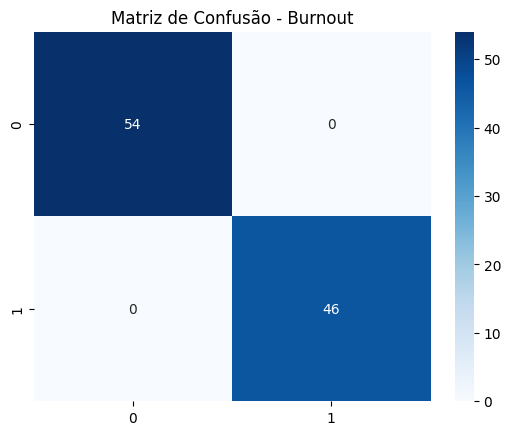


Modelo de classificação salvo.


In [ ]:
# 3. CLASSIFICAÇÃO – Prever BurnoutRisk

X_cls = df.drop(columns=["BurnoutRisk", "Productivity"])
y_cls = df["BurnoutRisk"]

X_train, X_test, y_train, y_test = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42
)

clf = RandomForestClassifier(
    n_estimators=200,
    max_depth=7,
    random_state=42
)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("\n===== CLASSIFICAÇÃO =====")
print("Acurácia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Matriz de Confusão - Burnout")
plt.show()

with open("modelo_burnout.pkl", "wb") as f:
    pickle.dump(clf, f)

print("\nModelo de classificação salvo.")



===== REGRESSÃO =====
MAE: 4.6504934092292345
MSE: 34.07277894217465
R²: 0.7897123688252996


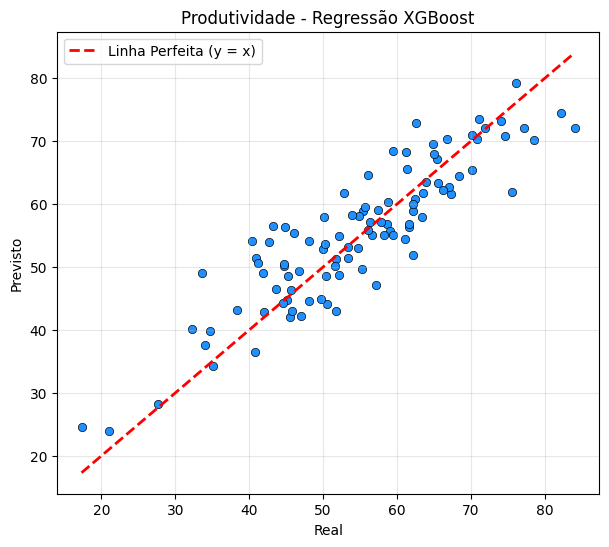


💾 Modelos de regressão e scaler salvos com sucesso.


In [11]:
# 4. REGRESSÃO – Prever Produtividade

# Features escolhidas para regressão
features_reg = [
    "StressLevel", "SleepHours", "Workload",
    "ManagerSupport", "WorkLifeBalance", "PhysicalActivity"
]

Xr = df[features_reg]
yr = df["Productivity"]

# Normalização
scaler = StandardScaler()
Xr_scaled = scaler.fit_transform(Xr)

# Treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    Xr_scaled, yr, test_size=0.2, random_state=42
)

# Modelo XGBoost
reg = XGBRegressor(
    n_estimators=300,
    learning_rate=0.08,
    max_depth=5,
    subsample=0.9,
    colsample_bytree=0.8,
    random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


reg.fit(X_train, y_train)
yr_pred = reg.predict(X_test)

# RESULTADOS

print("\n===== REGRESSÃO =====")
print("MAE:", mean_absolute_error(y_test, yr_pred))
print("MSE:", mean_squared_error(y_test, yr_pred))
print("R²:", r2_score(y_test, yr_pred))

plt.figure(figsize=(7,6))

# Scatter
sns.scatterplot(x=y_test, y=yr_pred, color='dodgerblue', edgecolor='black')

# Linha de referência y = x
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--',
    linewidth=2,
    label='Linha Perfeita (y = x)'
)

plt.xlabel("Real")
plt.ylabel("Previsto")
plt.title("Produtividade - Regressão XGBoost")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# -------------------------------------------
# SALVAR MODELO + SCALER
# -------------------------------------------
with open("modelo_produtividade.pkl", "wb") as f:
    pickle.dump(reg, f)

with open("scaler_prod.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("\n💾 Modelos de regressão e scaler salvos com sucesso.")
